-----
<div> <center> ESPACIO PARA BANNER DE LA MAESTRIA </center> </div>   

-----

<div style="text-align: justify">

# 03 - Conglomerados Jerárquicos
por [Ignacio Sarmiento Barbieri](https://ignaciomsarmiento.github.io/) y [Lucas Gómez Tobón]()

Los resultados del algoritmo de K-medias dependen de la elección del número de clústeres que se buscarán y de la posición inicial de los centroides. En cambio, los métodos de agrupación jerárquica no requieren tales especificaciones. Estos por su parte necesitan que el usuario especifique una medida de disimilitud entre *grupos* de observaciones, basándose en las disimilitudes por pares entre las observaciones en los dos grupos. Como sugiere el nombre, producen representaciones jerárquicas en las que los grupos en cada nivel de la jerarquía se crean fusionando grupos en el siguiente nivel inferior. En el nivel más bajo, cada grupo contiene una única observación. En el nivel más alto, solo hay un grupo que contiene todos los datos.

Las estrategias para la segmentación jerárquica se dividen en dos: aglomerativo (de abajo hacia arriba) y divisivo (de arriba hacia abajo). Las estrategias de aglomeración comienzan en la parte inferior y en cada nivel fusionan recursivamente un par seleccionado de grupos en un solo grupo. Esto produce una agrupación en el siguiente nivel superior con un grupo menos. La pareja elegida para la fusión consta de los dos grupos con la menor disimilitud intergrupal. Los métodos de división comienzan en la parte superior y en cada nivel dividen de forma recursiva uno de los grupos existentes en ese nivel en dos grupos nuevos. La división se elige para producir dos nuevos grupos con la mayor disimilitud entre grupos. Con ambos paradigmas, hay $N - 1$ niveles en la jerarquía.

Cada nivel de la jerarquía representa una agrupación particular de los datos en grupos de observaciones disjuntos. Toda la jerarquía representa una secuencia ordenada de tales agrupaciones. Depende del usuario decidir qué nivel (si lo hay) realmente representa un agrupamiento "natural" en el sentido de que las observaciones dentro de cada uno de sus grupos son suficientemente más similares entre sí que las observaciones asignadas a diferentes grupos en ese nivel. El estadístico Gap se puede utilizar para este propósito.

La división / aglomeración binaria recursiva se puede representar mediante un árbol. Los nodos de los árboles representan grupos. El nodo raíz representa el conjunto de datos completo. Los $N$ nodos terminales representan cada uno una de las observaciones individuales (clústeres singleton). Cada nodo no terminal ("padre") tiene dos nodos hijos. Para la agrupación divisiva, los dos hijos representan los dos grupos resultantes de la división del padre; para la agrupación aglomerativa, los hijos representan los dos grupos que se fusionaron para formar el padre.

La mayoría de los métodos de aglomeración y algunos de división (cuando se ven de abajo hacia arriba) poseen una propiedad de monotonicidad. Es decir, la disimilitud entre los clústeres fusionados es monótona y aumenta con el nivel de la fusión. Por lo tanto, el árbol se puede trazar de manera que la altura de cada nodo sea proporcional al valor de la disimilitud intergrupal entre sus dos hijos. Los nodos terminales que representan observaciones individuales se trazan todos a una altura cero. Este tipo de visualización gráfica se llama dendrograma.

Un dendrograma proporciona una descripción completa altamente interpretable de la agrupación jerárquica en un formato gráfico. Esta es una de las principales razones de la popularidad de los métodos de agrupación jerárquica

## Clustering jerárquico aglomerativo
Los algoritmos de agrupamiento aglomerativo comienzan con cada observación que representa un grupo único. En cada uno de los $N -1$ pasos, los dos grupos más cercanos (menos diferentes) se fusionan en un solo grupo, produciendo un grupo menos en el siguiente nivel superior. Por lo tanto, se debe definir una medida de disimilitud entre dos conglomerados (grupos de observaciones).

Definamos $G$ y $H$ como dos grupos. La disimilaridad entre ambos $d(G,H)$ se calcula a partir del conjunto de disimilitudes de observación por pares $d_{ii'}$ donde un miembro del par $i$ está en $G$ y el otro $i'$ está en $H$. La agrupación aglomerativa de **Enlace Simple (Single Linkage - SL)** toma la disimilitud intergrupal a partir del par más cercano (menos diferente):
$$d_{SL}(G, H)=\min_{i\in G,\ i'\in H} d_{ii'}$$

Esto también se denomina a menudo la técnica del vecino más cercano. La agrupación aglomerativa de **Enlace Completo (Complete Linkage - CL)** (técnica del vecino más lejano) toma la disimilitud entre grupos como la del par más lejano (más diferente):
$$d_{CL}(G, H)=\max_{i\in G,\ i'\in H} d_{ii'}$$

La agrupación en clústeres de **Promedio de Grupo (Group Average - GA)** utiliza la disimilitud promedio entre los grupos:
$$d_{GA}(G, H)=\frac{1}{N_G N_H}\sum_{i\in G}\sum_{i'\in H}d_{ii'}$$

donde $N_G$ y $N_H$ son los números respectivos de observaciones en cada grupo. Aunque ha habido muchas otras propuestas para definir la disimilitud intergrupal en el contexto de la agrupación aglomerativa, las tres anteriores son las más utilizadas.

Si las disimilaridades en los datos $\{d_{ii'}\}$ exhiben una fuerte tendencia a agruparse, con cada uno de los grupos siendo compacto y bien separado de los demás, entonces los tres métodos producirán resultados similares. Los clústeres son compactos si todas las observaciones dentro de ellos están relativamente cerca (pequeñas diferencias) en comparación con las observaciones en diferentes conglomerados. En la medida en que este no sea el caso, los resultados serán diferentes.

El **Enlace Simple (SL)** solo requiere que una única disimilitud $d_{ii'}$, $i\in G$ e $i'\in H$, sea pequeña para que dos grupos $G$ y $H$ se consideren cercanos, independientemente de las distancias entre el resto de observaciones. Por lo tanto este tipo de medida tendrá una tendencia a combinar, en umbrales relativamente bajos, observaciones vinculadas por una serie de observaciones intermedias cercanas. Este fenómeno denominado encadenamiento a menudo se considera un defecto del método. Los grupos producidos por el Enlace Simple (SL) pueden violar entonces la propiedad de "compacidad" la cual consiste en que todas las observaciones dentro de cada grupo deben ser similares entre sí, en función de las diferencias de observación proporcionadas $\{d_{ii'}\}$. Si definimos el diámetro $D_G$ de un grupo de observaciones como la mayor disimilitud entre sus miembros
$$D_G=\max_{i\in G,\ i'\in G}d_{ii'}$$
Entonces podemos afirmar que el Enlace Simple (SL) puede producir clústeres con un diametro muy grande.

El Enlace Completo o **Vinculación Completa (CL)** representa el caso opuesto. Dos grupos $G$ y $H$ se consideran cercanos solo si todas las observaciones de la unión son relativamente similares. Esto tiende a producir clústeres compactos con diametros pequeños. Sin embargo, este método puede producir agrupaciones que violen la propiedad de "cercanía". Esto es que las observaciones que se asignen a un clúster pueden ser más similares a algunas observaciones de otros clústeres en comparación con algunas observaciones de su propia agrupación.

El agrupamiento **Promedio de Grupo (GA)** representa un intermedio entre los dos extremos del enlace simple y completo. Intenta producir agrupaciones relativamente compactas que están relativamente alejadas. Sin embargo, sus resultados dependen de la escala numérica en la que se miden las diferencias de observación $d_{ii'}$. La aplicación de una transformación monótona estrictamente creciente $h(·)$ a $d_{ii'}$, $h_{ii'}= h(d_{ii'})$, puede cambiar el resultado producido por el enlace Promedio de Grupo. En contraste, los otros tipos de enlaces vistos dependen solo del orden de $d_{ii'}$ y, por lo tanto, son invariantes a tales transformaciones monótonas. Esta invariancia se utiliza a menudo como un argumento a favor de la vinculación simple o completa sobre los métodos de promedio de grupo.

## Clustering jerárquico divisivo
Los algoritmos de agrupación en clústeres divisivos comienzan con todo el conjunto de datos como un único clúster y dividen de forma recursiva uno de los clústeres existentes en dos clústeres secundarios en cada iteración de forma descendente. En el contexto de segmentación, una ventaja potencial de la división sobre los métodos aglomerativos puede ocurrir cuando el interés se centra en dividir los datos en un número relativamente pequeño de agrupaciones.

El paradigma divisivo se puede emplear aplicando recursivamente cualquiera de los métodos combinatorios como K-medias o K-medoides, con $K = 2$, para realizar las divisiones en cada iteración. Sin embargo, tal enfoque dependería de la configuración inicial especificada en cada paso. Además, no produciría necesariamente una secuencia de división que posea la propiedad de monotonicidad requerida para la representación de un dendrograma.

Macnaughton Smith et al. (1965). Propusieron un algoritmo divisivo que evita estos problemas. Comienza colocando todas las observaciones en un solo grupo $G$. Luego se elige la observación cuya diferencia promedio a todas las demás observaciones sea mayor. Esta observación forma el primer miembro de un segundo grupo $H$. En cada paso sucesivo, esa observación en $G$ cuya distancia promedio a las de $H$, menos la de las observaciones restantes en $G$ es mayor, se transfiere a $H$. Esto continúa hasta la diferencia correspondiente en promedios se vuelva negativa. Es decir, ya no hay observaciones en $G$ que estén, en promedio, más cerca de las de $H$. El resultado es una división del grupo original en dos grupos hijos, las observaciones que se transfieren a $H$ y las que se quedan en $G$. Estos dos grupos representan el segundo nivel de la jerarquía. Cada nivel sucesivo se produce aplicando este procedimiento de división a uno de los grupos del nivel anterior. Kaufman y Rousseeuw (1990) sugieren elegir el grupo en cada nivel con el diámetro más grande para la división. Otra alternativa sería elegir el grupo que tenga la mayor disimilitud promedio entre sus miembros.
$$\bar{d_G}=\frac{1}{N_G^2}\sum_{i\in G}\sum_{i'\in G} d_{ii'}$$
La partición recursiva continua hasta que todos los clústeres se vuelvan singletons o todos los miembros de cada segmento tengan disimilaridad cero entre ellos.

Ahora ilustraremos como aplicar la presente metodología a los datos creados anteriormente. En primer lugar vamos a construir un dendograma usando el método de Vinculación Simple.

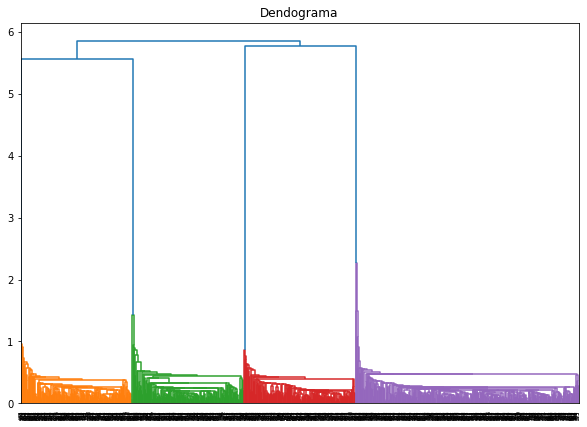

In [418]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (10, 7))  
plt.title("Dendograma")  
dendrograma = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.show()

El eje x contiene cada una de las observaciones y el eje y representa la distancia entre estas. El número óptimo de segmentos se puede encontrar a partir de la distancia vertical más grande. Cortando el dendograma con una línea horizontal en la altura 2, pasamos por 4 líneas horizontales por lo cual concluimos que la mejor segmentación se encuentra con 4 clústeres

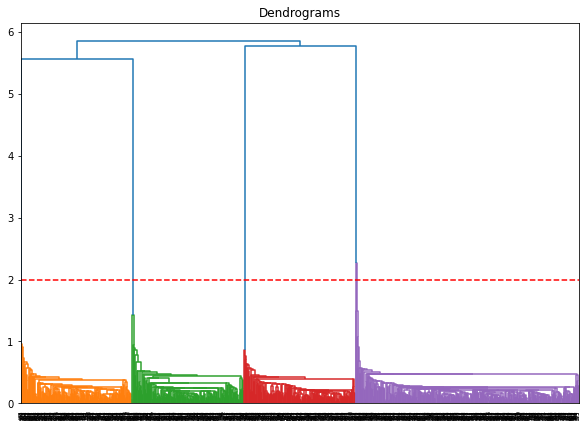

In [419]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dendrograma = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.axhline(y = 2, color = 'r', linestyle = '--')
plt.show()

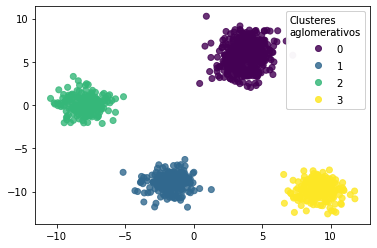

In [420]:
from sklearn.cluster import AgglomerativeClustering 
clusteres = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'single').fit_predict(X)

fig, ax = plt.subplots()

g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8)
legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\naglomerativos")
ax.add_artist(legend)

plt.show()

A continuación vamos a ilustrar cómo pueden variar los resultados del algoritmo de clustering jerarquico aglomerativo según el métodos de vinculación que escojamos.

In [421]:
from sklearn.preprocessing import StandardScaler

np.random.seed(666)
n_observaciones = 1500
# Creamos 6 bases de datos con mecanismos generadores de datos diferentes.
circulos = datasets.make_circles(n_samples = n_observaciones, factor = .5, noise = .05, random_state = 666)
lunas = datasets.make_moons(n_samples = n_observaciones, noise = .05, random_state = 666)
nubes = datasets.make_blobs(n_samples = n_observaciones, centers = 3, random_state = 170)
aleatorio = np.random.rand(n_observaciones, 2), None

transformacion = [[0.6, -0.6], [-0.4, 0.8]]
X_nubes2 = np.dot(nubes[0], transformacion)
nubes2 = (X_nubes2, nubes[1])

nubes3 = datasets.make_blobs(n_samples = n_observaciones, centers = 3, cluster_std = [1.0, 2.5, 0.5], random_state = 170)

Observemos nuestros datos

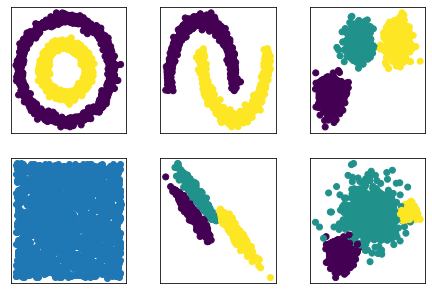

In [422]:
datos = [
    (circulos, {'n_clusteres': 2}),
    (lunas, {'n_clusteres': 2}),
    (nubes, {'n_clusteres': 3}), 
    (aleatorio, {'n_clusteres': 3}), 
    (nubes2, {'n_clusteres': 3}), 
    (nubes3, {'n_clusteres': 3})
    ]

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(left = .02, right = .98, bottom = .001, top = .96, wspace = .3, hspace = .2)
 
axs = axs.ravel()
n = 0
for df in datos:
    df = df[0]
    axs[n].scatter(x = df[0][:,0], y = df[0][:,1], c = df[1])
    axs[n].set_xticks([])
    axs[n].set_yticks([])
    n += 1

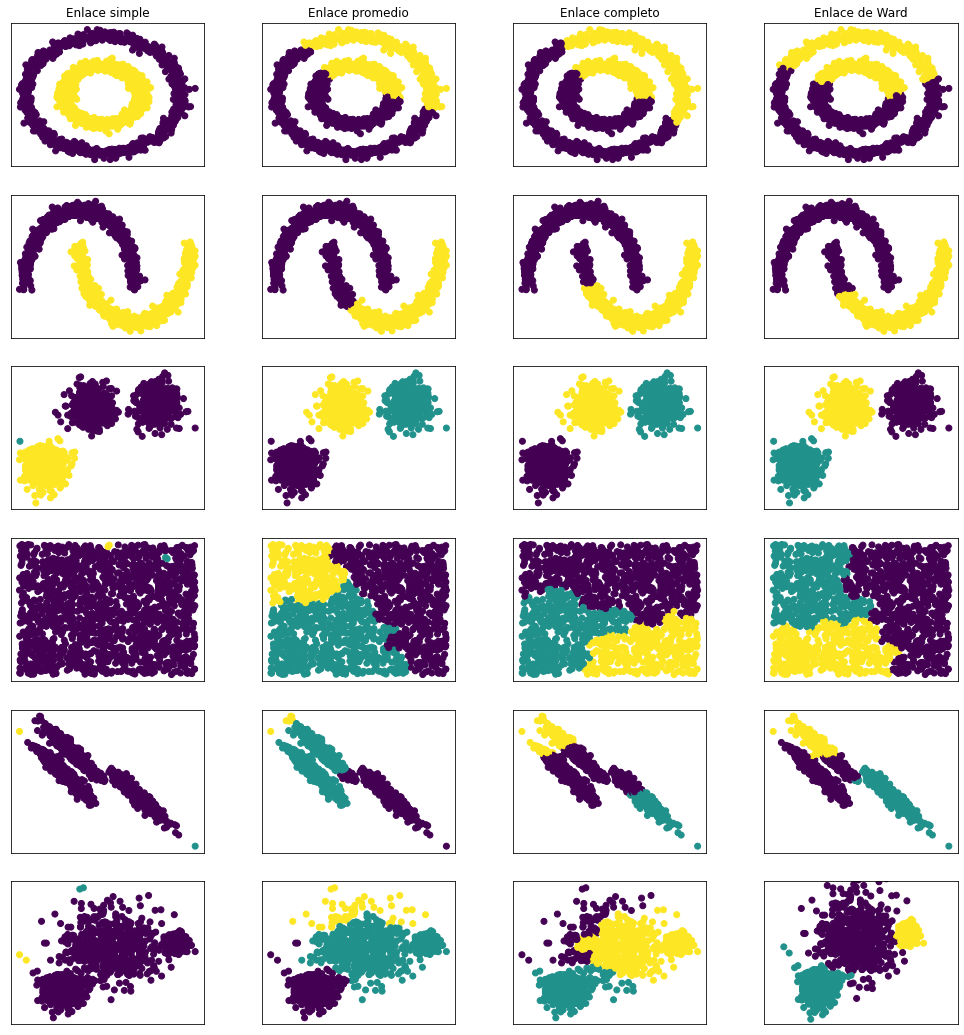

In [423]:
n = 0
fig, axs = plt.subplots(6, 4, figsize = (9 * 1.3 + 2, 14.5))
axs = axs.flatten()
plt.subplots_adjust(left = .02, right = .98, bottom = .001, top = .96, wspace = .3, hspace = .2)

for df, parametros in datos:
    X, y = df

    # Normalizamos la base de datos para que todas nos queden en la misma escala
    X = StandardScaler().fit_transform(X)
    ward = AgglomerativeClustering(n_clusters = parametros['n_clusteres'], linkage = 'ward')
    complete = AgglomerativeClustering(n_clusters = parametros['n_clusteres'], linkage = 'complete')
    average = AgglomerativeClustering(n_clusters = parametros['n_clusteres'], linkage = 'average')
    single = AgglomerativeClustering(n_clusters = parametros['n_clusteres'], linkage = 'single')

    metodo_vinculacion = (
            ('Enlace simple', single),
            ('Enlace promedio', average),
            ('Enlace completo', complete),
            ('Enlace de Ward', ward)
        )

    for nombre, enlace in metodo_vinculacion:
        enlace.fit(X)
        y_pred = enlace.labels_.astype(int)
        if n in range(0, 4):
            axs[n].title.set_text(nombre)
        axs[n].scatter(X[:, 0], X[:, 1], c = y_pred)
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        axs[n].set_xticks([])
        axs[n].set_yticks([])
        n += 1
        
plt.show()

## Recursos

Hastie, T., Tibshirani, R., & Friedman, J. H. (2001). The elements of statistical learning: Data mining, inference, and prediction. New York: Springer.

Kaufman, L. & Rousseeuw, P. (1990). Finding Groups in Data: An Introduction to Cluster Analysis, Wiley, New York.

Macnaughton Smith, P., Williams, W., Dale, M. & Mockett, L. (1965). Dissimilarity analysis: a new technique of hierarchical subdivision, Nature 202: 1034–1035.

[Scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py), Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. 